# Bacteria-phage with mutation test

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import island_evo_simulation_methods as ie
from scipy.stats import norm
plt.style.use('researchfigs')

In [4]:
plt.style.use('researchfigs')

In this notebook we test the functions for ecological dynamics with bacteria and phage, specifically with
a single island and with $G = -H^{\rm T}$.

## Random interactions

We first test out the case where $G$ is a random matrix. Note that this should be identical to the
antisymmetric Lotka-Volterra (in a statistical sense) when we have equal parameters for the bacteria
and the phage, as we do here.

In [65]:
D = 1
B = 200
P = 200
F = 2
M_b = 10
M_p = 10
omega_b = 1.0
omega_p = 1.0
thresh_b = -8.0*M_b
thresh_p = -8.0*M_p
inv_fac_b = np.exp(5.0)
inv_fac_p = np.exp(5.0)
dt = 0.3
mu_b = 0
mu_p = 0
D_b = None
D_p = None
seed = 101
epoch_timescale = 400.
epoch_num = 1
sample_num = 20


file_name = 'bp_eco_test_rand'

# interaction function

gamma = -1.0

def S(v,w):
    vec_seed = hash(str(v)+str(w))%(2**31)
    np.random.seed(vec_seed)
    
    Z_1 = np.random.randn()
    Z_2 = np.random.randn()
    
    G = Z_1
    H = gamma*Z_1+np.sqrt(1-gamma**2)*Z_2
    
    np.random.seed()
    return G,H


In [66]:
seed = 100

ie.bp_evo(file_name, D, B, P, F, M_b, M_p, omega_b, omega_p, thresh_b, thresh_p,
              inv_fac_b, inv_fac_p, dt, mu_b, mu_p,D_b, D_p, S, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1990: RuntimeWarning: divide by zero encountered in log
  x = np.log(n)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities


1
2


In [67]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [68]:
exp_data.keys()

dict_keys(['file_name', 'D', 'B', 'P', 'F', 'M_b', 'M_p', 'omega_b', 'omega_p', 'thresh_b', 'thresh_p', 'inv_fac_b', 'inv_fac_p', 'epoch_timescale', 'epoch_num', 'dt', 'mu_b', 'mu_p', 'D_b', 'D_p', 'S', 'seed', 'sample_num', 'N', 'm_b', 'm_p', 'B_tot', 'P_tot', 'vs', 'ws', 'increment', 'dt_list', 'epoch_time_list', 'lambda_b_mean_ave_list', 'lambda_b_mean_std_list', 'lambda_p_mean_ave_list', 'lambda_p_mean_std_list', 'b_init_list', 'b_mean_ave_list', 'b2_mean_ave_list', 'b_mig_mean_list', 'eta_b_list', 'b_mean_std_list', 'b2_mean_std_list', 'b_extinct_time_array', 'b_alive', 'p_init_list', 'p_mean_ave_list', 'p2_mean_ave_list', 'p_mig_mean_list', 'eta_p_list', 'p_mean_std_list', 'p2_mean_std_list', 'p_extinct_time_array', 'p_alive', 'b_traj_eq', 'p_traj_eq', 'b_traj_f', 'p_traj_f'])

In [71]:
def int_from_pheno(S,vs,ws):
    B = np.shape(vs)[1]
    P = np.shape(ws)[1]
    G = np.zeros((P,B))
    H = np.zeros((B,P))

    for i in range(B):
        for j in range(P):
            G[j,i], H[i,j] = S(vs[:,i],ws[:,j])

    return G,H

In [72]:
G,H = int_from_pheno(S,exp_data['vs'],exp_data['ws'])

In [73]:
def gen_random_phenos(F,B,P):
    vs = np.random.randn(F,B)
    ws = np.random.randn(F,P)

    for i in range(B):
        vs[:,i] = vs[:,i]/np.linalg.norm(vs[:,i])

    for j in range(P):
        ws[:, j] = ws[:, j] / np.linalg.norm(ws[:, j])

    return vs, ws

In [74]:
exp_data['ws']

array([[-0.73584328, -0.64844054,  0.0251782 , -0.17764535, -0.82687323,
         0.10869149, -0.98792687,  0.90070303, -0.87575625,  0.15952475,
        -0.62009275, -0.52459312,  0.88432493, -0.20201379,  0.62416935,
         0.63945782,  0.9821271 , -0.83865974,  0.71867108, -0.85401659,
        -0.52286678,  0.98206797, -0.41566526,  0.10135258,  0.55279834,
         0.99223512, -0.44968613, -0.21343897, -0.36566862, -0.03670206,
         0.42040969, -0.97401008, -0.16832414,  0.995123  ,  0.47078464,
        -0.91101688,  0.82768625,  0.12527522, -0.96000768, -0.98520856,
        -0.88044124, -0.90474856,  0.5829471 , -0.57556335, -0.87383523,
        -0.84153451, -0.28499712, -0.96742072,  0.92051601,  0.02574816,
         0.99315129,  0.6271827 ,  0.14256361, -0.14708047, -0.98748165,
        -0.30932212, -0.11114331,  0.71020597,  0.85101165,  0.72860959,
        -0.99381609, -0.79080784,  0.38625497,  0.06498981,  0.93625525,
        -0.45392958,  0.98061824, -0.60409254, -0.9

By looking at the dynamics before the first mutation is introduced, and at the last between-mutation
epoch, we can see that there are many types with abundance less than $M$ (on a single island)
that are staying around. Nonetheless, we also have invasion and extinction events.

In [75]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['b_traj_eq'])[1]

Text(0.5,1.03,'Bact. dynamics')

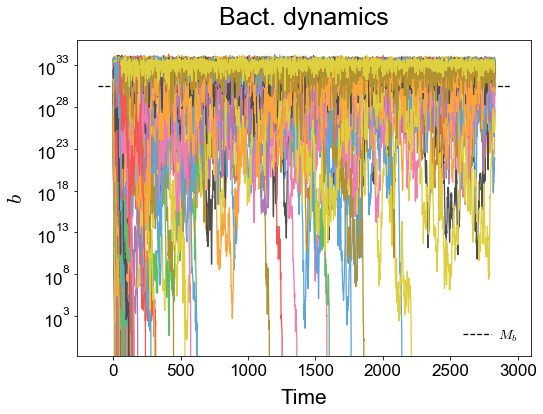

In [76]:
# full trajectory

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['b_traj_eq'])[1]),N_b*exp_data['b_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics',y=1.03)

Text(0.5,1.03,'Bact. dynamics early times')

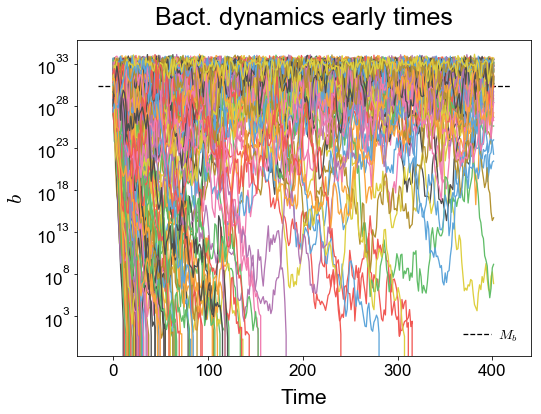

In [84]:
# initial timepoints

t_num = 300

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_num),N_b*exp_data['b_traj_eq'][:,0:t_num].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*exp_data['dt_list'][0]*t_num,
           xmax=1.04*exp_data['dt_list'][0]*t_num,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics early times',y=1.03)

Text(0.5,1.03,'Bact. dynamics, late times')

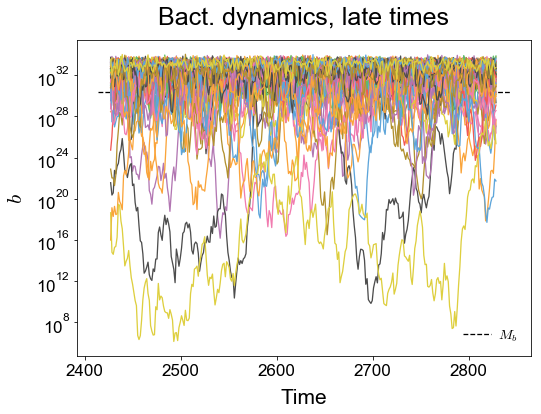

In [85]:
# final timepoints

t_num = 300
t_final = np.shape(exp_data['b_traj_eq'])[1]

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_final-t_num,t_final),
         N_b*exp_data['b_traj_eq'][:,-t_num:].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=exp_data['dt_list'][0]*(t_final-t_num-10),
           xmax=exp_data['dt_list'][0]*(t_final+10),
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics, late times',y=1.03)

In [86]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['p_traj_eq'])[1]

Text(0.5,1.03,'Phage dynamics')

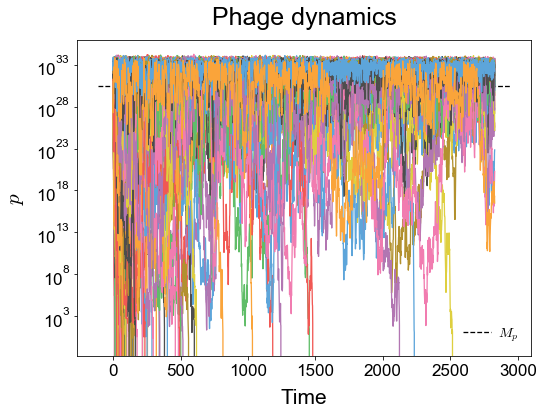

In [87]:
# full trajectory

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['p_traj_eq'])[1]),N_p*exp_data['p_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_p*np.exp(-M_p),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics',y=1.03)

Text(0.5,1.03,'Phage dynamics early times')

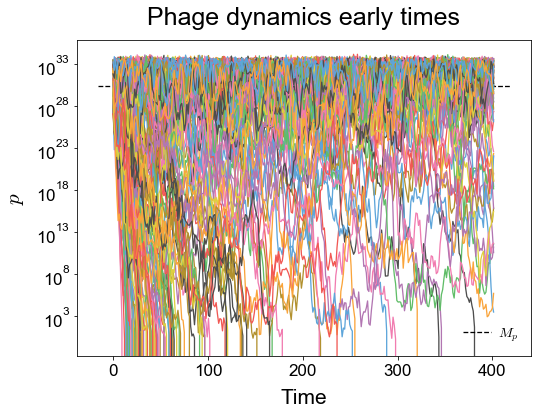

In [88]:
# initial timepoints

t_num = 300

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_num),N_p*exp_data['p_traj_eq'][:,0:t_num].T)
plt.yscale('log')
plt.hlines(y = N_p*np.exp(-M_p),xmin=-0.04*exp_data['dt_list'][0]*t_num,
           xmax=1.04*exp_data['dt_list'][0]*t_num,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics early times',y=1.03)

Text(0.5,1.03,'Phage dynamics, late times')

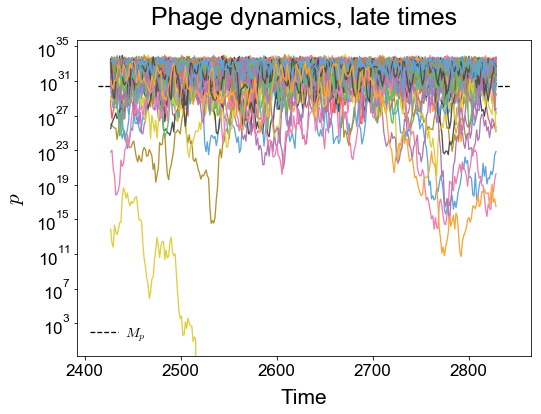

In [89]:
# final timepoints

t_num = 300
t_final = np.shape(exp_data['p_traj_eq'])[1]

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_final-t_num,t_final),
         N_p*exp_data['p_traj_eq'][:,-t_num:].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=exp_data['dt_list'][0]*(t_final-t_num-10),
           xmax=exp_data['dt_list'][0]*(t_final+10),
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics, late times',y=1.03)

## Phenotype model

Now we test a phenotype model, with phenotype function $S(v,w) = e^{-|v-w|/\ell_{c}}$. We rescale time so that
the instantaneous log velocities are the same as the random case above.

In [90]:
D = 1
B = 200
P = 200
F = 8
M_b = 10
M_p = 10
omega_b = 1.0
omega_p = 1.0
thresh_b = -8.0*M_b
thresh_p = -8.0*M_p
inv_fac_b = np.exp(5.0)
inv_fac_p = np.exp(5.0)
dt = 0.3
mu_b = 0
mu_p = 0
D_b = None
D_p = None
seed = 101
epoch_timescale = 400.
epoch_num = 1
sample_num = 20


file_name = 'bp_eco_test_smooth_pheno'

# interaction function

l_c = 1.0

def dist(v,w):
    return np.sqrt(np.dot(v,v)-2*np.dot(v,w)+np.dot(w,w))

def S(v,w):
    
    S_val = np.exp(-dist(v,w)/l_c)
    
    
    G = S_val
    H = -S_val
    
    return G,H

# set timescales properly
v,w = gen_random_phenos(F,100,100)
G,H = int_from_pheno(S,v,w)

sig_G = np.sqrt(np.var(G))
sig_H = np.sqrt(np.var(H))

time_fac = 2./(sig_G+sig_H) 

epoch_timescale = epoch_timescale*time_fac
dt = dt*time_fac

In [91]:
seed = 100

ie.bp_evo(file_name, D, B, P, F, M_b, M_p, omega_b, omega_p, thresh_b, thresh_p,
              inv_fac_b, inv_fac_p, dt, mu_b, mu_p,D_b, D_p, S, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1990: RuntimeWarning: divide by zero encountered in log
  x = np.log(n)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/atish/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1
2


In [92]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [93]:
exp_data.keys()

dict_keys(['file_name', 'D', 'B', 'P', 'F', 'M_b', 'M_p', 'omega_b', 'omega_p', 'thresh_b', 'thresh_p', 'inv_fac_b', 'inv_fac_p', 'epoch_timescale', 'epoch_num', 'dt', 'mu_b', 'mu_p', 'D_b', 'D_p', 'S', 'seed', 'sample_num', 'N', 'm_b', 'm_p', 'B_tot', 'P_tot', 'vs', 'ws', 'increment', 'dt_list', 'epoch_time_list', 'lambda_b_mean_ave_list', 'lambda_b_mean_std_list', 'lambda_p_mean_ave_list', 'lambda_p_mean_std_list', 'b_init_list', 'b_mean_ave_list', 'b2_mean_ave_list', 'b_mig_mean_list', 'eta_b_list', 'b_mean_std_list', 'b2_mean_std_list', 'b_extinct_time_array', 'b_alive', 'p_init_list', 'p_mean_ave_list', 'p2_mean_ave_list', 'p_mig_mean_list', 'eta_p_list', 'p_mean_std_list', 'p2_mean_std_list', 'p_extinct_time_array', 'p_alive', 'b_traj_eq', 'p_traj_eq', 'b_traj_f', 'p_traj_f'])

In [102]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['b_traj_eq'])[1]

We immediately see a difference: the extinction dynamics for the types with negative average fitness are
much slower than they are in the case of the random model.

Text(0.5,1.03,'Bact. dynamics')

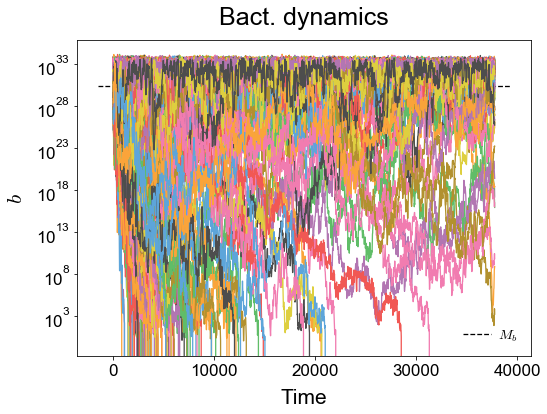

In [103]:
# full trajectory

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['b_traj_eq'])[1]),N_b*exp_data['b_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics',y=1.03)

Text(0.5,1.03,'Bact. dynamics early times')

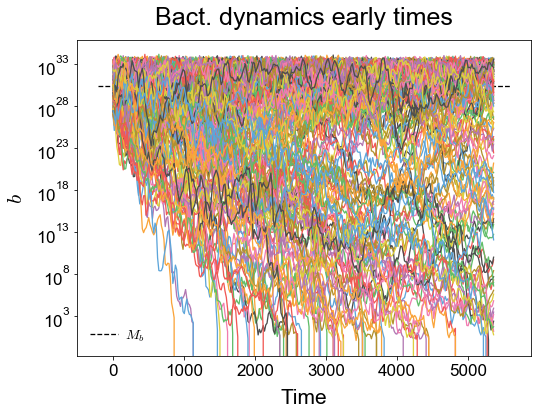

In [104]:
# initial timepoints

t_num = 300

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_num),N_b*exp_data['b_traj_eq'][:,0:t_num].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*exp_data['dt_list'][0]*t_num,
           xmax=1.04*exp_data['dt_list'][0]*t_num,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics early times',y=1.03)

Text(0.5,1.03,'Bact. dynamics, late times')

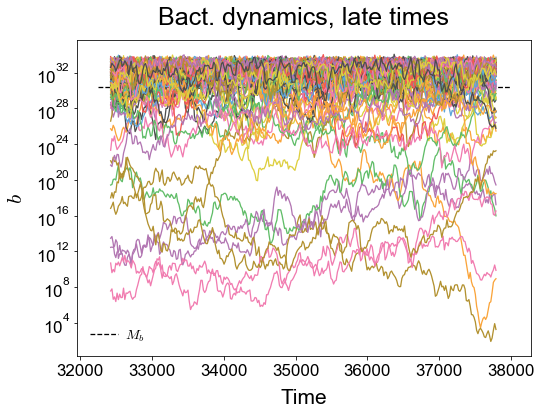

In [105]:
# final timepoints

t_num = 300
t_final = np.shape(exp_data['b_traj_eq'])[1]

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_final-t_num,t_final),
         N_b*exp_data['b_traj_eq'][:,-t_num:].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=exp_data['dt_list'][0]*(t_final-t_num-10),
           xmax=exp_data['dt_list'][0]*(t_final+10),
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics, late times',y=1.03)

In [106]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['p_traj_eq'])[1]

Text(0.5,1.03,'Phage dynamics')

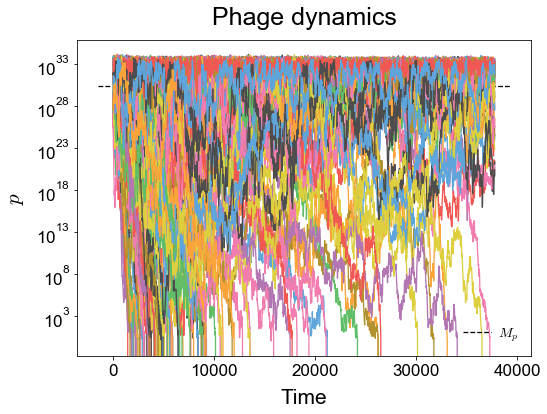

In [107]:
# full trajectory

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['p_traj_eq'])[1]),N_p*exp_data['p_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_p*np.exp(-M_p),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics',y=1.03)

Text(0.5,1.03,'Phage dynamics early times')

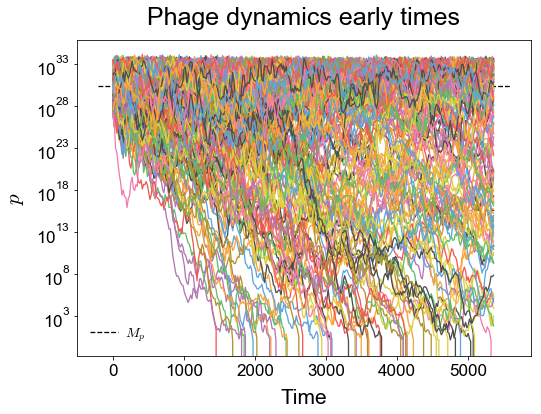

In [108]:
# initial timepoints

t_num = 300

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_num),N_p*exp_data['p_traj_eq'][:,0:t_num].T)
plt.yscale('log')
plt.hlines(y = N_p*np.exp(-M_p),xmin=-0.04*exp_data['dt_list'][0]*t_num,
           xmax=1.04*exp_data['dt_list'][0]*t_num,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics early times',y=1.03)

Text(0.5,1.03,'Phage dynamics, late times')

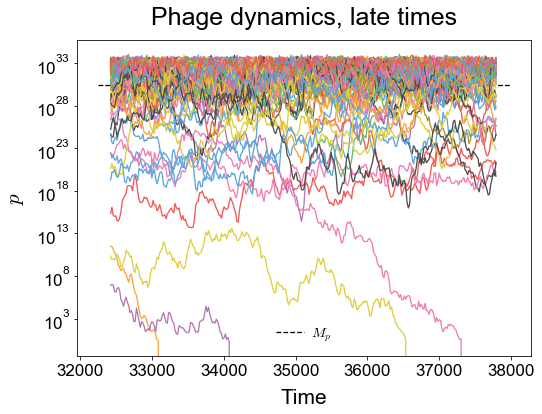

In [109]:
# final timepoints

t_num = 300
t_final = np.shape(exp_data['p_traj_eq'])[1]

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_final-t_num,t_final),
         N_p*exp_data['p_traj_eq'][:,-t_num:].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=exp_data['dt_list'][0]*(t_final-t_num-10),
           xmax=exp_data['dt_list'][0]*(t_final+10),
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics, late times',y=1.03)

In [124]:
# late time instantaneous log slopes

G,H = int_from_pheno(S,exp_data['vs'],exp_data['ws'])

eta_bs = np.dot(G,exp_data['p_traj_eq'][:,-1])
eta_bs = eta_bs - np.dot(exp_data['b_traj_eq'][:,-1],eta_bs)
eta_bs = eta_bs*np.sqrt(B)*time_fac/np.sqrt(2)

Plotting the instantaneous growth rates, and normalizing for the magnitude of $G$ as well as the number of
types, we see that the distribution is roughly Gaussian with variance $1$, as expected. This suggests that
the issue is not that we got the short timescale wrong; extinctions really are slower in the smooth
phenotype model.

Text(0.5,1.03,'Distribution of $\\dot{b}/b$, phenotype model')

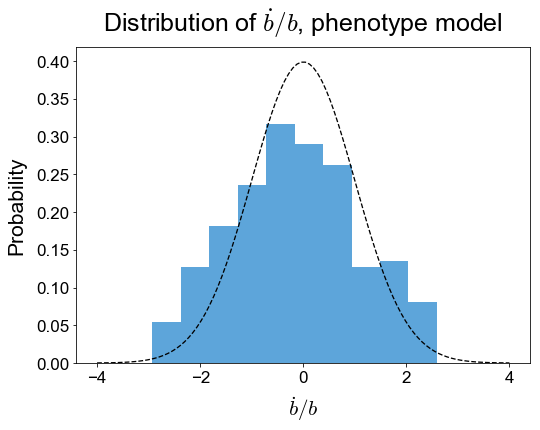

In [126]:

plt.hist(eta_bs,density=True)

xs = np.linspace(-4.0,4.0,100)
ys = np.exp(-xs**2/2)/np.sqrt(2*np.pi)

plt.plot(xs,ys,label='Gaussian',color='k',ls='--')
plt.xlabel('$\dot{b}/b$')
plt.ylabel('Probability')
plt.title('Distribution of $\dot{b}/b$, phenotype model',y=1.03)